


### About the data set (COMPANY_Reviews)

Sentiment Analyzer is an NLP project designed to analyze and categorize user-generated text into positive, negative, or neutral sentiments. The project utilizes machine learning algorithms to train a sentiment analysis model on a diverse dataset of user reviews. Once trained, the model can automatically predict the sentiment expressed in new text, making it a valuable tool for businesses to understand customer feedback, monitor social media sentiment, and derive actionable insights from large volumes of textual data. 
Technologies:
Natural Language Processing (NLP), Machine Learning, Python, Scikit-Learn, Text Preprocessing.
The dataset contains Text reviews. The aim of this assignment is to classsify the review texts into two categories. 

Attribute information: 
 
Dataset has two columns:
Column2: Review Text
Column1: Two Classes. Positive and negative.

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

2. Load the Data

2.1 Read the data

In [60]:
df = pd.read_csv("sentiment_analysis.csv", encoding='latin-1')

2.2 Dispay the first ten rows

In [61]:
df.head(5)

,Sentiment,Review
0,negative,The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers ...
1,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profi...
2,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net ..."
3,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
4,positive,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m ."


2.3 Display the information about the data

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  1967 non-null   object
 1   Review     1967 non-null   object
dtypes: object(2)
memory usage: 30.9+ KB


2.4   Encode the sentiment column values as 1 or 0

In [63]:
df['Sentiment'].replace({'negative': 0, 'positive': 1},inplace=True)

df

,Sentiment,Review
0,0,The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers ...
1,1,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profi...
2,1,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net ..."
3,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs .
4,1,"For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m ."
...,...,...
1962,0,"HELSINKI Thomson Financial - Shares in Cargotec fell sharply in early afternoon trade after the cargo handling group posted a surprise drop in April-June profits , which overshadowed the large num..."
1963,0,LONDON MarketWatch -- Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100 .
1964,0,"Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn ."
1965,0,"Net sales of the Paper segment decreased to EUR 221.6 mn in the second quarter of 2009 from EUR 241.1 mn in the second quarter of 2008 , while operating profit excluding non-recurring items rose t..."


3.  Data preprocessing

3.1 Remove special characters and html tags

In [65]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters
    
    return text

df['Review'] = df['Review'].apply(clean_text)
df

,Sentiment,Review
0,0,The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers ...
1,1,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profi...
2,1,According to the company s updated strategy for the years 20092012 Basware targets a longterm net sales growth in the range of 20 40 with an operating profit margin of 10 20 of net sales
3,1,FINANCING OF ASPOCOMP S GROWTH Aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding HDI printed circuit boards PCBs
4,1,For the last quarter of 2010 Componenta s net sales doubled to EUR131m from EUR76m for the same period a year earlier while it moved to a zero pretax profit from a pretax loss of EUR7m
...,...,...
1962,0,HELSINKI Thomson Financial Shares in Cargotec fell sharply in early afternoon trade after the cargo handling group posted a surprise drop in AprilJune profits which overshadowed the large number...
1963,0,LONDON MarketWatch Share prices ended lower in London Monday as a rebound in bank stocks failed to offset broader weakness for the FTSE 100
1964,0,Operating profit fell to EUR 354 mn from EUR 688 mn in 2007 including vessel sales gain of EUR 123 mn
1965,0,Net sales of the Paper segment decreased to EUR 2216 mn in the second quarter of 2009 from EUR 2411 mn in the second quarter of 2008 while operating profit excluding nonrecurring items rose to EU...


3.2 - Convert reviews into lowercase

In [66]:
df['Review'] = df['Review'].str.lower()
df

,Sentiment,Review
0,0,the international electronic industry company elcoteq has laid off tens of employees from its tallinn facility contrary to earlier layoffs the company contracted the ranks of its office workers ...
1,1,with the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profi...
2,1,according to the company s updated strategy for the years 20092012 basware targets a longterm net sales growth in the range of 20 40 with an operating profit margin of 10 20 of net sales
3,1,financing of aspocomp s growth aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding hdi printed circuit boards pcbs
4,1,for the last quarter of 2010 componenta s net sales doubled to eur131m from eur76m for the same period a year earlier while it moved to a zero pretax profit from a pretax loss of eur7m
...,...,...
1962,0,helsinki thomson financial shares in cargotec fell sharply in early afternoon trade after the cargo handling group posted a surprise drop in apriljune profits which overshadowed the large number...
1963,0,london marketwatch share prices ended lower in london monday as a rebound in bank stocks failed to offset broader weakness for the ftse 100
1964,0,operating profit fell to eur 354 mn from eur 688 mn in 2007 including vessel sales gain of eur 123 mn
1965,0,net sales of the paper segment decreased to eur 2216 mn in the second quarter of 2009 from eur 2411 mn in the second quarter of 2008 while operating profit excluding nonrecurring items rose to eu...


3.3 - Removal of stop words

In [67]:
from nltk.corpus import stopwords

def stop_word(text):
    wpt = nltk.WordPunctTokenizer()
    stop_words = set(stopwords.words('english'))
    tokens=wpt.tokenize(text)
    filtered_tokens=[token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc

df['Review'] = df['Review'].apply(stop_word)
df

,Sentiment,Review
0,0,international electronic industry company elcoteq laid tens employees tallinn facility contrary earlier layoffs company contracted ranks office workers daily postimees reported
1,1,new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability
2,1,according company updated strategy years 20092012 basware targets longterm net sales growth range 20 40 operating profit margin 10 20 net sales
3,1,financing aspocomp growth aspocomp aggressively pursuing growth strategy increasingly focusing technologically demanding hdi printed circuit boards pcbs
4,1,last quarter 2010 componenta net sales doubled eur131m eur76m period year earlier moved zero pretax profit pretax loss eur7m
...,...,...
1962,0,helsinki thomson financial shares cargotec fell sharply early afternoon trade cargo handling group posted surprise drop apriljune profits overshadowed large number new orders received three months
1963,0,london marketwatch share prices ended lower london monday rebound bank stocks failed offset broader weakness ftse 100
1964,0,operating profit fell eur 354 mn eur 688 mn 2007 including vessel sales gain eur 123 mn
1965,0,net sales paper segment decreased eur 2216 mn second quarter 2009 eur 2411 mn second quarter 2008 operating profit excluding nonrecurring items rose eur 80 mn eur 76 mn


3.4 - Apply stemming

In [68]:
import nltk
from nltk.stem import PorterStemmer

p_stemmer = PorterStemmer()


def apply_stemming(text):
    words = text.split()
    words = [p_stemmer.stem(word) for word in words]
    return ' '.join(words)
    
df['Review'] = df['Review'].apply(apply_stemming)
df


,Sentiment,Review
0,0,intern electron industri compani elcoteq laid ten employe tallinn facil contrari earlier layoff compani contract rank offic worker daili postime report
1,1,new product plant compani would increas capac meet expect increas demand would improv use raw materi therefor increas product profit
2,1,accord compani updat strategi year 20092012 baswar target longterm net sale growth rang 20 40 oper profit margin 10 20 net sale
3,1,financ aspocomp growth aspocomp aggress pursu growth strategi increasingli focus technolog demand hdi print circuit board pcb
4,1,last quarter 2010 componenta net sale doubl eur131m eur76m period year earlier move zero pretax profit pretax loss eur7m
...,...,...
1962,0,helsinki thomson financi share cargotec fell sharpli earli afternoon trade cargo handl group post surpris drop apriljun profit overshadow larg number new order receiv three month
1963,0,london marketwatch share price end lower london monday rebound bank stock fail offset broader weak ftse 100
1964,0,oper profit fell eur 354 mn eur 688 mn 2007 includ vessel sale gain eur 123 mn
1965,0,net sale paper segment decreas eur 2216 mn second quarter 2009 eur 2411 mn second quarter 2008 oper profit exclud nonrecur item rose eur 80 mn eur 76 mn


4.  Convert review text into feature vector and classification

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv_matrix = cv.fit_transform(data['Review'])
cv_matrix

<1967x5501 sparse matrix of type '<class 'numpy.int64'>'
	with 36700 stored elements in Compressed Sparse Row format>

4.1 - create BOW model 

In [71]:
x = cv_matrix.toarray()
vocab = cv.get_feature_names_out()
pd.DataFrame(x, columns=vocab)


,00,000,002,007,01,019,02,027,029,03,...,æki,æl,æmeri,ænen,ænge,ænnen,ænsi,ærtsil,ærvi,ærvinen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


4.2 - Training data and Test data -split

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cv_matrix, df['Sentiment'], test_size = 0.3, random_state = 10, stratify= df['Sentiment'])

X_train.shape , y_train.shape

((1376, 5501), (1376,))

4.3 - Define the Classification model (any one like NB, SVM or Random forest) train the model

In [76]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [79]:
y_pred = nb_classifier.predict(X_test)

4.4  Classification metrics analysis and plot the confusion matrix

<Axes: >

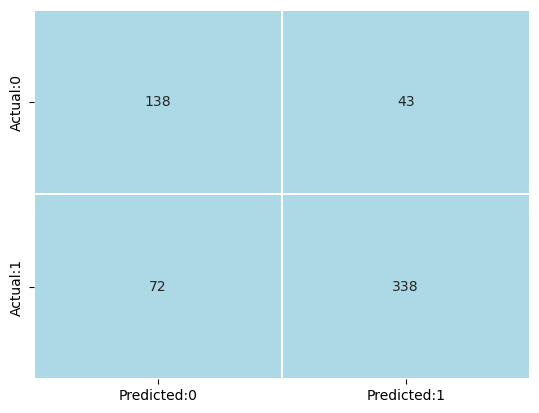

In [81]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':10})

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71       210
           1       0.82      0.89      0.85       381

    accuracy                           0.81       591
   macro avg       0.79      0.77      0.78       591
weighted avg       0.80      0.81      0.80       591



In [83]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.805414551607445

4.5 - predict the class for your own review

In [118]:
your_review = ["london marketwatch share prices ended lower london monday rebound bank stocks failed offset broader weakness ftse 100"]
your_review_bow = cv.transform(your_review)
your_review_pred = nb_classifier.predict(your_review_bow)
print("Your review prediction:", "Positive" if your_review_pred[0] == 1 else "Negative")


Your review prediction: Negative


4.6 - create feature vector using tf-idf

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(max_features=2500)
tf = tv.fit_transform(df['Review'])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(tf, df['Sentiment'], test_size = 0.3, random_state = 10 ,stratify=df['Sentiment'])

X_train.shape , y_train.shape

((1376, 2500), (1376,))

4.7 Define the Classification model (any one like NB, SVM or Random forest) train the model

In [111]:
from sklearn.naive_bayes import MultinomialNB
sentiment_detect_model = MultinomialNB()
sentiment_detect_model.fit(X_train, y_train)

MultinomialNB()

4.8 - Classification metrics analysis

<Axes: >

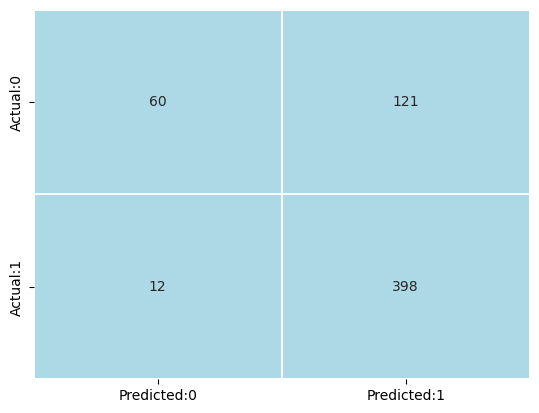

In [112]:
y_pred = sentiment_detect_model.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

tf_cm = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = tf_cm, columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':10})

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.33      0.83      0.47        72
           1       0.97      0.77      0.86       519

    accuracy                           0.77       591
   macro avg       0.65      0.80      0.67       591
weighted avg       0.89      0.77      0.81       591



In [114]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7749576988155669

4.9 - predict the class for your own review

In [119]:
your_review_tfidf = tv.transform(your_review)
your_review_pred_tfidf = sentiment_detect_model.predict(your_review_tfidf)
print("Your review prediction (TF-IDF):", "Positive" if your_review_pred_tfidf[0] == 1 else "Negative")

Your review prediction (TF-IDF): Negative
